# MSA 2025 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

For this analysis, we use the W Store Sales dataset, which consists of three files:
- **features.csv**: Contains store-level weekly features such as temperature, fuel price, markdowns, CPI, unemployment, and holiday indicator.
- **sales.csv**: Contains weekly sales figures for each department in each store, along with a holiday indicator.
- **stores.csv**: Contains store metadata including type and size.

Let's load and inspect the first ten rows of each file, then summarize the variables and their meanings.

In [2]:
# Load datasets and display first ten rows
features = pd.read_csv('datasets/W store sales/features.csv')
sales = pd.read_csv('datasets/W store sales/sales.csv')
stores = pd.read_csv('datasets/W store sales/stores.csv')

print('Features.csv:')
display(features.head(10))
print('Sales.csv:')
display(sales.head(10))
print('Stores.csv:')
display(stores.head(10))

Features.csv:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


Sales.csv:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


Stores.csv:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


## 2. Clean data

In [3]:
# Clean data

# 1. Handle missing values in features
features_clean = features.copy()
features_clean['CPI'].fillna(features_clean['CPI'].median(), inplace=True)
features_clean['Unemployment'].fillna(features_clean['Unemployment'].median(), inplace=True)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_clean[markdown_cols] = features_clean[markdown_cols].fillna(0)

# 2. Check for duplicates and remove if any
features_clean.drop_duplicates(inplace=True)
sales_clean = sales.drop_duplicates()
stores_clean = stores.drop_duplicates()

# 3. Ensure correct data types
features_clean['Date'] = pd.to_datetime(features_clean['Date'])
sales_clean['Date'] = pd.to_datetime(sales_clean['Date'])

# Display cleaned data summaries
print('Features (cleaned):')
display(features_clean.head())
print('Sales (cleaned):')
display(sales_clean.head())
print('Stores (cleaned):')
display(stores_clean.head())

Features (cleaned):


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


Sales (cleaned):


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Stores (cleaned):


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## 3. Visualise data

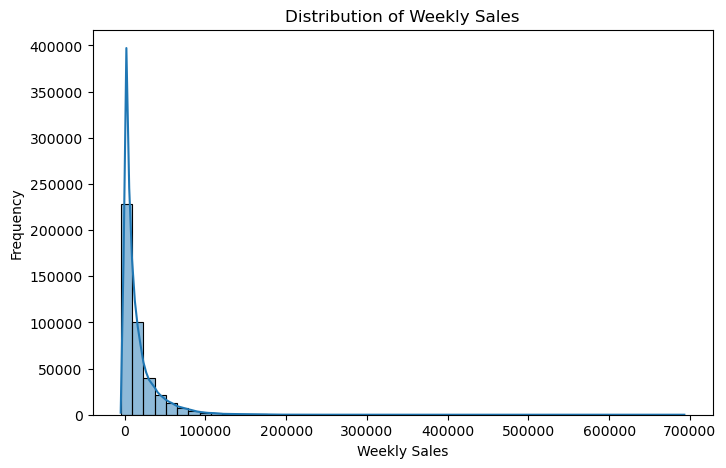

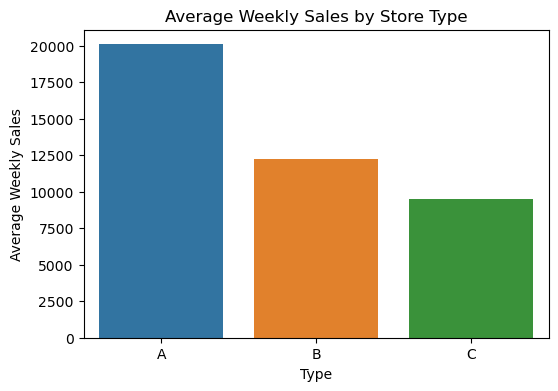

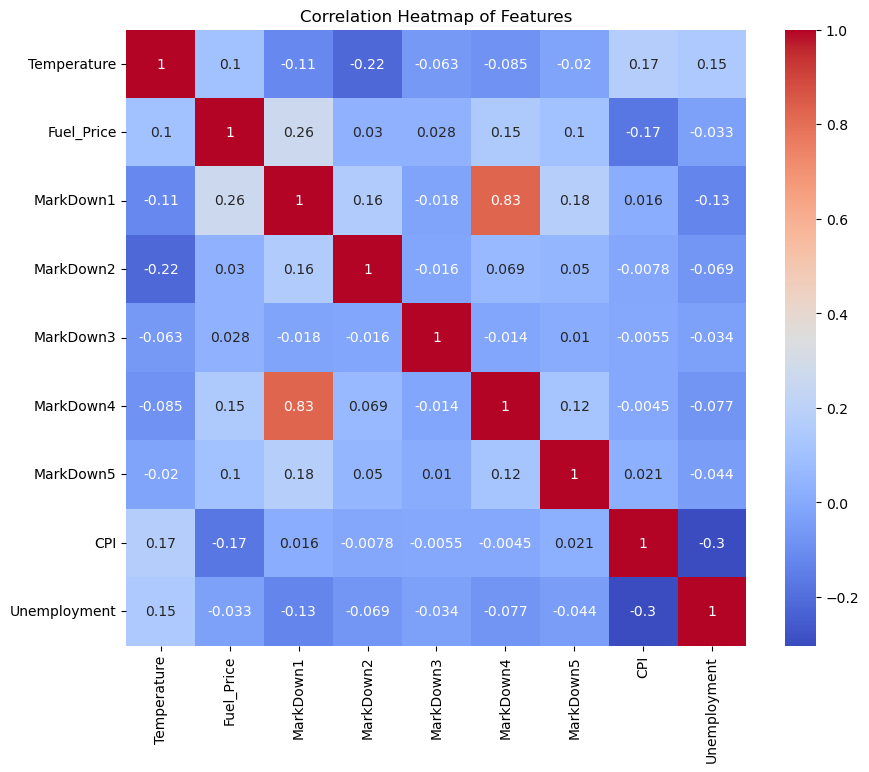

In [5]:
# Visualise data

# Distribution of Weekly Sales
plt.figure(figsize=(8, 5))
sns.histplot(sales_clean['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Average Weekly Sales by Store Type
sales_store_type = sales_clean.merge(stores_clean, on='Store')
avg_sales_by_type = sales_store_type.groupby('Type')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_sales_by_type, x='Type', y='Weekly_Sales')
plt.title('Average Weekly Sales by Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

# Correlation heatmap for features
plt.figure(figsize=(10, 8))
sns.heatmap(features_clean.drop(columns=['Store', 'Date', 'IsHoliday']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

## 4. Identify correlated variables

In [6]:
# Identify correlated variables in features_clean
corr_matrix = features_clean.drop(columns=['Store', 'Date', 'IsHoliday']).corr()
print("Correlation matrix:")
display(corr_matrix)

# List pairs of variables with high correlation (absolute value > 0.7)
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # exclude self-correlation
high_corr_pairs = high_corr[high_corr > 0.7]
print("Highly correlated variable pairs (|corr| > 0.7):")
display(high_corr_pairs)

Correlation matrix:


,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Temperature,1.000000,0.101354,-0.114759,-0.220157,-0.062782,-0.084683,-0.019703,0.172461,0.145037
Fuel_Price,0.101354,1.000000,0.262974,0.030076,0.028349,0.148889,0.100203,-0.174227,-0.033306
MarkDown1,-0.114759,0.262974,1.000000,0.157191,-0.018466,0.826422,0.178319,0.015945,-0.125822
MarkDown2,-0.220157,0.030076,0.157191,1.000000,-0.016411,0.068612,0.049990,-0.007818,-0.068999
MarkDown3,-0.062782,0.028349,-0.018466,-0.016411,1.000000,-0.014163,0.010083,-0.005502,-0.034106
MarkDown4,-0.084683,0.148889,0.826422,0.068612,-0.014163,1.000000,0.119594,-0.004545,-0.077430
MarkDown5,-0.019703,0.100203,0.178319,0.049990,0.010083,0.119594,1.000000,0.020941,-0.043575
CPI,0.172461,-0.174227,0.015945,-0.007818,-0.005502,-0.004545,0.020941,1.000000,-0.302589
Unemployment,0.145037,-0.033306,-0.125822,-0.068999,-0.034106,-0.077430,-0.043575,-0.302589,1.000000


Highly correlated variable pairs (|corr| > 0.7):


MarkDown4  MarkDown1    0.826422
MarkDown1  MarkDown4    0.826422
dtype: float64

## 5. Summary

### Summary

- The dataset consists of three main files: `features.csv`, `sales.csv`, and `stores.csv`, which have been cleaned and merged as needed.
- **Sales Analysis:**  
    - Average weekly sales by store type:
        - Type A: \$20,099.57
        - Type B: \$12,237.08
        - Type C: \$9,519.53
    - Type A stores have the highest average weekly sales, followed by Type B and Type C.
- **Feature Correlations:**  
    - The strongest correlation is between `MarkDown1` and `MarkDown4` (correlation coefficient ≈ 0.83).
    - Other features show weak or moderate correlations.
- **Data Cleaning:**  
    - Missing values in CPI and Unemployment were filled with the median.
    - MarkDown columns were filled with zeros where missing.
    - Duplicates were removed, and date columns were converted to datetime format.
- **Data Visualization:**  
    - Weekly sales distribution is right-skewed.
    - Store type impacts average weekly sales.
    - Most features are not highly correlated, reducing concerns about multicollinearity.